# Assignment 7: Using a Pipeline for Text Transformation and Classification

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_roc_curve, accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline

In this assignment, you will practice text vectorization to transform text into numerical feature vectors that can be used to train a classifier. You will then see how to use scikit-learn pipelines to chain together these processes into one step. You will:

1. Load the book reviews data set.
2. Use a single text column as a feature. 
3. Transform features using a TF-IDF vectorizer. 
4. Fit a logistic regression model to the transformed features. 
5. Evaluate the performance of the model using AUC.
6. Set up a scikit-learn pipeline to perform the same tasks above. 
7. Execute the pipeline and verify that the performance is the same.
8. Add a grid search to the pipeline to find the optimal hyperparameter configuration.
9. Evaluate the performance of the optimal configuration using ROC-AUC.

**<font color='red'>Note: some of the code cells in this notebook may take a while to run</font>**

## Part 1: Load the Data Set

We will work with the book review dataset that you worked with in the sentiment analysis demo.

In [2]:
filename = os.path.join(os.getcwd(), "data", "bookReviews.csv")
df = pd.read_csv(filename, header=0)

In [3]:
df.head()

,Review,Positive Review
0,This was perhaps the best of Johannes Steinhof...,True
1,This very fascinating book is a story written ...,True
2,The four tales in this collection are beautifu...,True
3,The book contained more profanity than I expec...,False
4,We have now entered a second time of deep conc...,True


In [4]:
df.shape

(1973, 2)

## Part 2: Create Training and Test Data Sets

### Create Labeled Examples 

<b>Task</b>: Create labeled examples from DataFrame `df`. We will have one text feature and one label.  

In the code cell below carry out the following steps:

* Get the `Positive Review` column from DataFrame `df` and assign it to the variable `y`. This will be our label.
* Get the column `Review` from DataFrame `df` and assign it to the variable `X`. This will be our feature.


In [12]:
y = df['Positive Review']
X = df['Review']

In [13]:
X.head

<bound method NDFrame.head of 0       This was perhaps the best of Johannes Steinhof...
1       This very fascinating book is a story written ...
2       The four tales in this collection are beautifu...
3       The book contained more profanity than I expec...
4       We have now entered a second time of deep conc...
                              ...                        
1968    I purchased the book with the intention of tea...
1969    There are so many design books, but the Graphi...
1970    I am thilled to see this book being available ...
1971    As many have stated before me the book starts ...
1972    I love this book! It is a terrific blend of ha...
Name: Review, Length: 1973, dtype: object>

In [14]:
X.shape

(1973,)

### Split Labeled Examples into Training and Test Sets

<b>Task</b>: In the code cell below create training and test sets out of the labeled examples. 

1. Use scikit-learn's `train_test_split()` function to create the data sets.

2. Specify:
    * A test set that is 20 percent (.20) of the size of the data set.
    * A seed value of '1234'. 

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = .2, random_state = 1234)

## Part 3: Implement TF-IDF Vectorizer to Transform Text

<b>Task</b>: Complete the code in the cell below to implement a TF-IDF transformation on the training and test data.
Use the "Transforming Text For a Classifier" demo as a guide. Follow the following steps:

1. Create a `TfidfVectorizer` object and save it to the variable `tfidf_vectorizer`.
2. Call `tfidf_vectorizer.fit()` to fit the vectorizer to the training data `X_train`.
3. Call the `tfidf_vectorizer.transform()` method to use the fitted vectorizer to transform the training data `X_train`. Save the result to `X_train_tfidf`.
4. Call the `tfidf_vectorizer.transform()` method to use the fitted vectorizer to transform the test data `X_test`. Save the result to `X_test_tfidf`.

In [16]:
# 1. Create a TfidfVectorizer object and save it to the variable 'tfidf_vectorizer'
tfidf_vectorizer = TfidfVectorizer()

# 2. Fit the vectorizer to X_train
tfidf_vectorizer.fit(X_train)

# 3. Using the fitted vectorizer, transform the training data and save the data to variable 'X_train_tfidf'
X_train_tfidf = tfidf_vectorizer.transform(X_train)

# 4. Using the fitted vectorizer, transform the test data and save the data to variable 'X_test_tfidf'
X_test_tfidf = tfidf_vectorizer.transform(X_test)


In [17]:
print(X_test_tfidf)

  (0, 18965)	0.059491023406618646
  (0, 18727)	0.08752131471965732
  (0, 18642)	0.03533743581074492
  (0, 18593)	0.03466402255636781
  (0, 18539)	0.10400005525124341
  (0, 18496)	0.09274785194457173
  (0, 18455)	0.0276659188493222
  (0, 18126)	0.051656463721148134
  (0, 17733)	0.1213832032593689
  (0, 17680)	0.1213832032593689
  (0, 17618)	0.06952952155086067
  (0, 17302)	0.047594430972735094
  (0, 17259)	0.0725088662135299
  (0, 17226)	0.04030762713391491
  (0, 17133)	0.1295180018700078
  (0, 17117)	0.049162328805929446
  (0, 17104)	0.07672093808666652
  (0, 17066)	0.047152835152653096
  (0, 17061)	0.04603216704495873
  (0, 17053)	0.043249080127104864
  (0, 17044)	0.03390923842467748
  (0, 17040)	0.02324158038379852
  (0, 16805)	0.05557793152499216
  (0, 16288)	0.1104156579703061
  (0, 16266)	0.05275501870340633
  :	:
  (394, 16266)	0.11591490667341263
  (394, 16183)	0.16526647998794597
  (394, 14669)	0.21441548095429677
  (394, 11847)	0.041179983410956134
  (394, 11711)	0.11266334411

## Part 4: Fit a Logistic Regression Model to the Transformed Training Data and Evaluate the Model
<b>Task</b>: Complete the code cell below to train a logistic regression model using the TF-IDF features, and compute the AUC on the test set.

Follow the following steps:

1. Create the `LogisticRegression` model object below and assign to variable `model`. Supply `LogisticRegression()` the following argument: `max_iter=200`.
2. Fit the logistic regression model to the transformed training data (`X_train_tfidf` and `y_train`).
3. Use the predict_proba() method to make predictions on the test data (`X_test_tfidf`). Save the second column to the variable `probability_predictions`. 
4. Use the `roc_auc_score()` function to compute the area under the ROC curve for the test data. Call the
function with the arguments `y_test` and `probability_predictions`. Save the result to the variable `auc`.
5. The 'vocabulary_' attribute of the vectorizer (`tfidf_vectorizer.vocabulary_`) returns the feature space. It returns a dictionary; find the length of the dictionary to get the size of the feature space. Save the result to `len_feature_space`.

In [19]:
# 1. Create the LogisticRegression model object
model = LogisticRegression(max_iter=200)

# 2. Fit the model to the transformed training data
model.fit(X_train_tfidf, y_train)

# 3. Use the predict_proba() method to make predictions on the test data
probability_predictions = model.predict_proba(X_test_tfidf)[:, 1]

# 4. Compute the area under the ROC curve for the test data
auc = roc_auc_score(y_test, probability_predictions)

print('AUC on the test data: {:.4f}'.format(auc))

# 5. Compute the size of the resulting feature space
#print(tfidf_vectorizer.vocabulary_)
len_feature_space = len(tfidf_vectorizer.vocabulary_)

print('The size of the feature space: {}'.format(len_feature_space))


AUC on the test data: 0.9161
The size of the feature space: 19029


## Part 5: Experiment with Different Document Frequency Values and Analyze the Results

<b>Task</b>: The cell below will loop over a range of 'document frequency' values. For each value, it will fit a vectorizer specifying `ngram_range=(1,2)`. It will then fit a logistic regression model to the transformed data and evaluate the results.   

Complete the loop in the cell below by 

1. adding a list containing four document frequency values that you would like to use (e.g. `[1, 10, 100, 1000]`)
2. adding the code you wrote above inside the loop. 

Note: This may take a short while to run.

In [20]:
for min_df in [1, 10, 100, 1000]: 
    
    print('\nDocument Frequency Value: {0}'.format(min_df))

    # 1. Create a TfidfVectorizer object and save it to the variable 'tfidf_vectorizer'
    # Use the arguments: 'ngram_range=(1,2)'' and 'min_df=min_df'   
    tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2), min_df=min_df)
    

    # 2. Fit the vectorizer to X_train  
    tfidf_vectorizer.fit(X_train)
    

    # 3. Using the fitted vectorizer, transform the training data.
    # Save the transformed training data to variable 'X_train_tfidf'
    X_train_tfidf = tfidf_vectorizer.transform(X_train)
    

    # 4. Using the fitted vectorizer, transform the test data.
    # Save the transformed test data to variable 'X_test_tfidf'
    X_test_tfidf = tfidf_vectorizer.transform(X_test)
    
    
    # 5. Create the LogisticRegression model object and save it to variable 'model'.
    # Call LogisticRegression() with the argument 'max_iter=200'
    model = LogisticRegression(max_iter=200)
        
    # 6. Fit the model to the transformed training data
    model.fit(X_train_tfidf, y_train)


    # 7. Use the predict_proba() method to make predictions on the transformed test data. 
    # Save the second column to the variable 'probability_predictions' 
    probability_predictions = model.predict_proba(X_test_tfidf)[:, 1]
    

    # 8. Using roc_auc_score() function to compute the AUC. 
    ## Save the result to the variable 'auc'
    auc = roc_auc_score(y_test, probability_predictions)
    
    
    print('AUC on the test data: {:.4f}'.format(auc))
    

    # 9. Compute the size of the resulting feature space. 
    # Save the result to the variable 'len_feature_space'
    len_feature_space = len(tfidf_vectorizer.vocabulary_)


    print('The size of the feature space: {0}'.format(len_feature_space))




Document Frequency Value: 1
AUC on the test data: 0.9310
The size of the feature space: 143560

Document Frequency Value: 10
AUC on the test data: 0.9254
The size of the feature space: 4257

Document Frequency Value: 100
AUC on the test data: 0.8625
The size of the feature space: 279

Document Frequency Value: 1000
AUC on the test data: 0.6557
The size of the feature space: 10


<b>Task</b>: Which document frequency value and feature space produced the best performing model? Do you notice any patterns regarding the number of document frequency values, the feature space and the AUC? Record your findings in the cell below.

AUC on the test data decreases as the document frequency value increases so they may not be as effective in capturing relevant patterns for the classification task. As the size of the feature space decreases, the AUC also decreases. Having a larger feature space allows the model to capture more info but reducing the feature space may over simplify the model.

## Part 6: Set up a TF-IDF + Logistic Regression Pipeline

We will look at a new way to chain together various methods to automate the machine learning workflow. We will use  the scikit-learn `Pipeline` utility. For more information, consult the online [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html). First, let's import `Pipeline`.

In [21]:
from sklearn.pipeline import Pipeline

The code cell below will use a scikit-learn pipeline to perform TF-IDF vectorization and the fitting of a logistic regression model to the transformed data.

This will be implemented in the following steps:

1. First we will create a list containing the steps to perform in the pipeline. Items in the list will be executed in the order in which they appear.

    Each item in the list is a tuple consisting of two items: 
    1. A descriptive name of what is being performed. You can create any name you'd like.
    2. The code to run.
    
    
2. Next we will create a Pipeline object and supply it the list of steps using the `step` parameter


3. We will use this pipeline as we would any model object and fit this pipeline to the original training data. Note that when calling the `fit()` method on the pipeline object, all of the steps in the pipeline are performed on the data.


4. Finally, we will use pipeline object to make predictions on the original test data. When calling the `predict_proba()` method on the pipeline object, all of the steps in the pipeline are performed on the data. 


<b>Task:</b> In the code cell below, complete step 3 and 4 using the pipeline object  `model_pipeline`.

In [22]:
print('Begin ML pipeline...')

# 1. Define the list of steps:
s = [
        ("vectorizer", TfidfVectorizer(ngram_range=(1,2), min_df=10)),
        ("model", LogisticRegression(max_iter=200))
    ]

# 2. Define the pipeline:
model_pipeline = Pipeline(steps=s)

# We can use the pipeline the way would would use a model object 
# when fitting the model on the training data and testing on the test data:

# 3. Fit the pipeline to the training data
model_pipeline.fit(X_train, y_train)

# 4. Make predictions on the test data
# Save the second column to the variable 'probability_predictions'
probability_predictions = model_pipeline.predict_proba(X_test)[:, 1]


print('End pipeline')

Begin ML pipeline...
End pipeline


Let's compare the performance of our model. 

<b>Task</b>: In the code cell below, call the function `roc_auc_score()` with arguments `y_test` and `probability_predictions`. Save the results to the variable `auc_score`.


In [23]:
# Evaluate the performance by computing the AUC

auc_score = roc_auc_score(y_test, probability_predictions)

print('AUC on the test data: {:.4f}'.format(auc_score))

AUC on the test data: 0.9254


In some case, scikit-learn gives you the ability to provide a pipeline object as an argument to a function. One such function is `plot_roc_curve()`. You'll see in the online [documentation](https://scikit-learn.org/0.23/modules/generated/sklearn.metrics.plot_roc_curve.html) that this function can take a pipeline (estimator) as an argument. Calling `plot_roc_curve()` with the pipeline and the test data will accomplish the same tasks as steps 3 and 4 in the code cell above.

Let's import the function and try it out.

<b>Task:</b> Call `plot_roc_curve()` with the following three arguments:
1. The pipeline object `model_pipeline`
2.  `X_test`
3. `y_test`

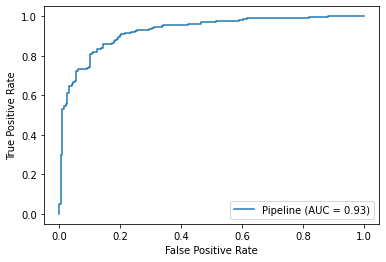

In [25]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(model_pipeline, X_test, y_test)

Note that in newer versions of scikit-learn, this function has been replaced by [RocCurveDisplay](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html).

## Part 7: Perform a GridSearchCV on the Pipeline to Find the Best Hyperparameters 


You will perform a grid search on the pipeline object `model_pipeline` to find the hyperparameter configuration for hyperparameter $C$ (for the logistic regression) and for the $ngram\_range$ (for the TF-IDF vectorizer) that result in the best cross-validation score.

<b>Task:</b> Define a parameter grid to pass to `GridSearchCV()`. Recall that the parameter grid is a dictionary. Name the dictionary `param_grid`.

The dictionary should contain two key value pairs:

1. a key specifying the  $C$ hyperparameter name, and a value containing the list `[0.1, 1, 10]`.
2. a key specifying the $ngram\_range$ hyperparameter name, and a value containing the list `[(1,1), (1,2)]`.

Note that following:

When running a grid search on a pipelines, the hyperparameter names you specify in the parameter grid are the names of the pipeline items (the descriptive names you provided to the items in the pipeline) followed by two underscores, followed by the actual hyperparameter names. 

For example, note what we named the pipeline items above:

```
s = [
        ("vectorizer", TfidfVectorizer(ngram_range=(1,2), min_df=10)),
        ("model", LogisticRegression(max_iter=200))
    ]
```

We named the the classifier `model` and the vectorizer `vectorizer`. 

Since we named our classifier `model`, the hyperparameter name for $C$ that you would specify as they key in `param_grid` is `model__C`. You can find a list containing possible pipeline hyperparameter names you can use by running the code the cell below.

In [27]:
model_pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'vectorizer', 'model', 'vectorizer__analyzer', 'vectorizer__binary', 'vectorizer__decode_error', 'vectorizer__dtype', 'vectorizer__encoding', 'vectorizer__input', 'vectorizer__lowercase', 'vectorizer__max_df', 'vectorizer__max_features', 'vectorizer__min_df', 'vectorizer__ngram_range', 'vectorizer__norm', 'vectorizer__preprocessor', 'vectorizer__smooth_idf', 'vectorizer__stop_words', 'vectorizer__strip_accents', 'vectorizer__sublinear_tf', 'vectorizer__token_pattern', 'vectorizer__tokenizer', 'vectorizer__use_idf', 'vectorizer__vocabulary', 'model__C', 'model__class_weight', 'model__dual', 'model__fit_intercept', 'model__intercept_scaling', 'model__l1_ratio', 'model__max_iter', 'model__multi_class', 'model__n_jobs', 'model__penalty', 'model__random_state', 'model__solver', 'model__tol', 'model__verbose', 'model__warm_start'])

In [28]:
param_grid = {
    'model__C': [0.1, 1, 10],  # Hyperparameter C for Logistic Regression
    'vectorizer__ngram_range': [(1, 1), (1, 2)]  # Hyperparameter ngram_range for TF-IDF Vectorizer
}


param_grid

{'model__C': [0.1, 1, 10], 'vectorizer__ngram_range': [(1, 1), (1, 2)]}

<b>Task:</b> Run a grid search on the pipeline.

1. Call `GridSearchCV()` with the following arguments:

    1. Pipeline object `model_pipeline`.
    2. Parameter grid `param_grid`.
    3. Specify 3 cross validation folds using the `cv` parameter.
    4. Specify that the scoring method is `roc_auc` using the `scoring` parameter.
    5. To monitor the progress of the grid search, supply the argument `verbose=2`.
    
    Assign the output to the object `grid`.
    
    
2. Fit `grid` on the training data (`X_train` and `y_train`) and assign the result to variable `grid_search`.



In [29]:
print('Running Grid Search...')

# 1. Run a Grid Search with 3-fold cross-validation and assign the output to the 
# object 'grid_LR'.
grid = GridSearchCV(model_pipeline, param_grid, cv=3, scoring='roc_auc', verbose=2)

# 2. Fit the model (grid) on the training data and assign the fitted model to the variable 'grid_search'.
grid_search = grid.fit(X_train, y_train)

print('Done')

Running Grid Search...
Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] model__C=0.1, vectorizer__ngram_range=(1, 1) ....................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..... model__C=0.1, vectorizer__ngram_range=(1, 1), total=   0.4s
[CV] model__C=0.1, vectorizer__ngram_range=(1, 1) ....................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] ..... model__C=0.1, vectorizer__ngram_range=(1, 1), total=   0.4s
[CV] model__C=0.1, vectorizer__ngram_range=(1, 1) ....................
[CV] ..... model__C=0.1, vectorizer__ngram_range=(1, 1), total=   0.4s
[CV] model__C=0.1, vectorizer__ngram_range=(1, 2) ....................
[CV] ..... model__C=0.1, vectorizer__ngram_range=(1, 2), total=   1.3s
[CV] model__C=0.1, vectorizer__ngram_range=(1, 2) ....................
[CV] ..... model__C=0.1, vectorizer__ngram_range=(1, 2), total=   1.2s
[CV] model__C=0.1, vectorizer__ngram_range=(1, 2) ....................
[CV] ..... model__C=0.1, vectorizer__ngram_range=(1, 2), total=   1.3s
[CV] model__C=1, vectorizer__ngram_range=(1, 1) ......................
[CV] ....... model__C=1, vectorizer__ngram_range=(1, 1), total=   0.4s
[CV] model__C=1, vectorizer__ngram_range=(1, 1) ......................
[CV] ....... model__C=1, vectorizer__ngram_range=(1, 1), total=   0.5s
[CV] model__C=1, vectorizer__ngram_range=(1, 1) ......................
[CV] .

[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   16.2s finished


Done


Run the code below to see the best pipeline configuration that was determined by the grid search.

In [30]:
grid_search.best_estimator_

Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=10, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('model',
                 LogisticRegression(C=10, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_

<b>Task</b>: Print the best hyperparameters by accessing them by using the `best_params_` attribute.

In [31]:
grid_search.best_params_

{'model__C': 10, 'vectorizer__ngram_range': (1, 2)}

Recall that in the past, after we obtained the best hyperparameter values from a grid search, we re-trained a model with these values in order to evaluate the performance. This time we will do something different. Just as we can pass a pipeline object directly to `plot_roc_curve()` to evaluate the model, we can pass `grid_search.best_estimator_` to the function `plot_roc_curve()` to evaluate the model. We also pass in the test data (`X_test` and `y_test`). This allows the test data to be passed through the entire pipeline, using the best hyperparameter values.


<b>Task</b>: In the code cell below plot the ROC curve and compute the AUC by calling the function `plot_roc_curve()` with the arguments `grid_search.best_estimator_` and the test data (`X_test` and  `y_test`). Note that you can simply just pass `grid_search` to the function as well.

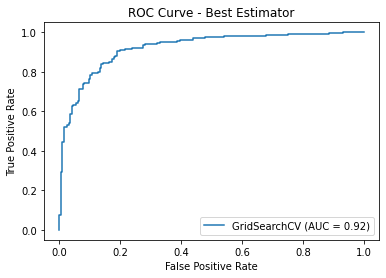

In [32]:
plot_roc_curve(grid_search, X_test, y_test)
plt.title('ROC Curve - Best Estimator')
plt.show()